# Objective
he "target" field refers to the presence of heart disease in the patient. It is integer valued 0 = no/less chance of heart attack and 1 = more chance of heart attack
1) age
2) sex
3) chest pain type (4 values)
4) resting blood pressure
5) serum cholestoral in mg/dl
6)fasting blood sugar > 120 mg/dl
7) resting electrocardiographic results (values 0,1,2)
8) maximum heart rate achieved
9) exercise induced angina
10) oldpeak = ST depression induced by exercise relative to rest
11)the slope of the peak exercise ST segment
12) number of major vessels (0-3) colored by flourosopy
13) thal: 0 = normal; 1 = fixed defect; 2 = reversable defect
14) target: 0= less chance of heart attack 1= more chance of heart attack


In [19]:
#Importing libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O 
import os
import matplotlib.pyplot as plt#visualization
from PIL import  Image
%matplotlib inline
import pandas as pd
import seaborn as sns#visualization
import itertools
import warnings
warnings.filterwarnings("ignore")
import io
import plotly.offline as py#visualization
py.init_notebook_mode(connected=True)#visualization
import plotly.graph_objs as go#visualization
import plotly.tools as tls#visualization
import plotly.figure_factory as ff#visualization

# 1. Data Importing

In [20]:
import pandas as pd
heart = pd.read_csv (r"heart1.csv")
heart

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


# 2. Data Pre-Processing 

1. Data Type and conversion
2. Data Manipulation

#### 2.1. Data Type and conversion

In [21]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [22]:
#replace values
heart.target =heart.target.replace({1:"Yes",0:"No"})

In [23]:
heart.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

# 4.Outlier identify & Treatment 

<AxesSubplot:>

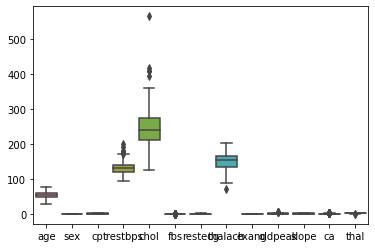

In [24]:
import seaborn as sns
sns.boxplot(data=heart)

In [25]:
q1 = heart['trestbps'].quantile(0.25)
q3 = heart['trestbps'].quantile(0.75)
iqr = q3-q1 #Interquartile range
#low_limit = q1-1.5*iqr #acceptable range
upper_limit = q3+1.5*iqr #acceptable range
upper_limit

170.0

In [26]:
heart['trestbps']=np.where(heart['trestbps'] > upper_limit,upper_limit,heart['trestbps']) # upper limit

<AxesSubplot:ylabel='trestbps'>

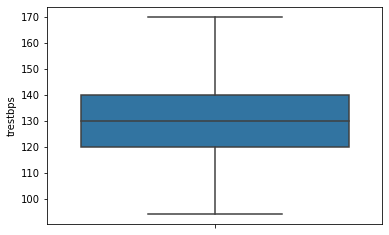

In [27]:
sns.boxplot(y=heart.trestbps)  # Single Variable

In [28]:
q1 = heart['chol'].quantile(0.25)
q3 = heart['chol'].quantile(0.75)
iqr = q3-q1 #Interquartile range
#low_limit = q1-1.5*iqr #acceptable range
upper_limit = q3+1.5*iqr #acceptable range
upper_limit

369.75

In [29]:
heart['chol']=np.where(heart['chol'] > upper_limit,upper_limit,heart['chol']) # upper limit

<AxesSubplot:ylabel='chol'>

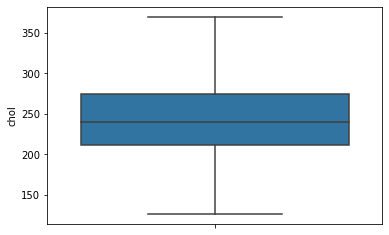

In [30]:
sns.boxplot(y=heart.chol) 

In [31]:
q1 = heart['fbs'].quantile(0.25)
q3 = heart['fbs'].quantile(0.75)
iqr = q3-q1 #Interquartile range
#low_limit = q1-1.5*iqr #acceptable range
upper_limit = q3+1.5*iqr #acceptable range
upper_limit

0.0

In [32]:
heart['fbs']=np.where(heart['fbs'] > upper_limit,upper_limit,heart['fbs']) # upper limit

<AxesSubplot:ylabel='fbs'>

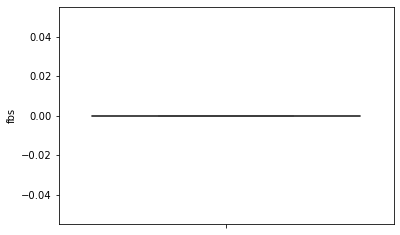

In [33]:
sns.boxplot(y=heart.fbs)

In [34]:
q1 = heart['thalach'].quantile(0.25)
q3 = heart['thalach'].quantile(0.75)
iqr = q3-q1 #Interquartile range
low_limit = q1-1.5*iqr #acceptable range
#upper_limit = q3+1.5*iqr #acceptable range
low_limit

84.75

In [35]:
heart['thalach']=np.where(heart['thalach'] < low_limit,low_limit,heart['thalach']) # upper limit

<AxesSubplot:ylabel='thalach'>

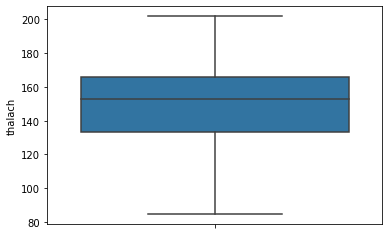

In [36]:
sns.boxplot(y=heart.thalach)

In [37]:
q1 = heart['oldpeak'].quantile(0.25)
q3 = heart['oldpeak'].quantile(0.75)
iqr = q3-q1 #Interquartile range
#low_limit = q1-1.5*iqr #acceptable range
upper_limit = q3+1.5*iqr #acceptable range
upper_limit

4.0

In [38]:
heart['oldpeak']=np.where(heart['oldpeak'] > upper_limit,upper_limit,heart['oldpeak']) # upper limit

<AxesSubplot:ylabel='oldpeak'>

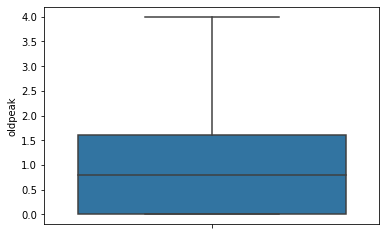

In [39]:
sns.boxplot(y=heart.oldpeak)

In [40]:
q1 = heart['ca'].quantile(0.25)
q3 = heart['ca'].quantile(0.75)
iqr = q3-q1 #Interquartile range
#low_limit = q1-1.5*iqr #acceptable range
upper_limit = q3+1.5*iqr #acceptable range
upper_limit

2.5

In [41]:
heart['ca']=np.where(heart['ca'] > upper_limit,upper_limit,heart['ca']) # upper limit

<AxesSubplot:ylabel='ca'>

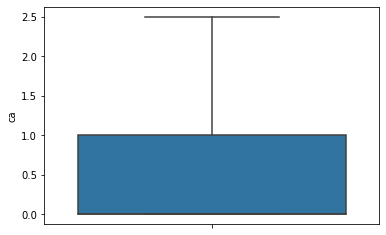

In [42]:
sns.boxplot(y=heart.ca)

In [43]:
q1 = heart['thal'].quantile(0.25)
q3 = heart['thal'].quantile(0.75)
iqr = q3-q1 #Interquartile range
low_limit = q1-1.5*iqr #acceptable range
#upper_limit = q3+1.5*iqr #acceptable range
low_limit

0.5

In [44]:
heart['thal']=np.where(heart['thal'] < low_limit,low_limit,heart['thal']) # upper limit

<AxesSubplot:ylabel='thal'>

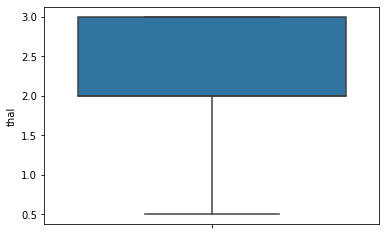

In [45]:
sns.boxplot(y=heart.thal)

# Data Visualization

In [46]:
import plotly.express as px

fig = px.pie(heart,names='target',color='target',
             color_discrete_map={'Yes':'red',
                                 'No':'green'})
fig.show()

# 5.Labeling the data  

In [95]:
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145.0,233.0,0.0,0,150.0,0,2.3,0,0.0,1.0,Yes
1,37,1,2,130.0,250.0,0.0,1,187.0,0,3.5,0,0.0,2.0,Yes
2,41,0,1,130.0,204.0,0.0,0,172.0,0,1.4,2,0.0,2.0,Yes
3,56,1,1,120.0,236.0,0.0,1,178.0,0,0.8,2,0.0,2.0,Yes
4,57,0,0,120.0,354.0,0.0,1,163.0,1,0.6,2,0.0,2.0,Yes


In [96]:
heart.select_dtypes(include=[np.number]).columns.tolist()

['age',
 'sex',
 'cp',
 'trestbps',
 'chol',
 'fbs',
 'restecg',
 'thalach',
 'exang',
 'oldpeak',
 'slope',
 'ca',
 'thal']

In [97]:
# #Employee Numeric columns
heart_num = heart[heart.select_dtypes(include=[np.number]).columns.tolist()]
heart_num.head(3)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145.0,233.0,0.0,0,150.0,0,2.3,0,0.0,1.0
1,37,1,2,130.0,250.0,0.0,1,187.0,0,3.5,0,0.0,2.0
2,41,0,1,130.0,204.0,0.0,0,172.0,0,1.4,2,0.0,2.0


In [98]:
from sklearn.preprocessing import LabelEncoder
heart_dummies=heart_dummies.apply(LabelEncoder().fit_transform)
heart_dummies.head(3)
# label in ascending order

Series([], dtype: float64)

# Data Partition 

In [99]:
from sklearn.model_selection import train_test_split

# define our input variable (X) & output variable
X = heart.drop('target', axis = 1)
Y = heart[['target']]
# Split X and y into X_
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=1234)

In [100]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier

# by default 100 tree will be form 
Model = RandomForestClassifier(n_estimators=20, # make 20 tress
                               criterion="gini",
                               max_depth=4,  # each tree will have 4 branches
                               min_samples_split=100,# each tree will have parent node
                               min_samples_leaf=50,# each tree will have Child node
                               max_features="sqrt")# n_estimators means number tree we want  

Model.fit(X_train, y_train)

RandomForestClassifier(max_depth=4, max_features='sqrt', min_samples_leaf=50,
                       min_samples_split=100, n_estimators=20)

# Importance Features

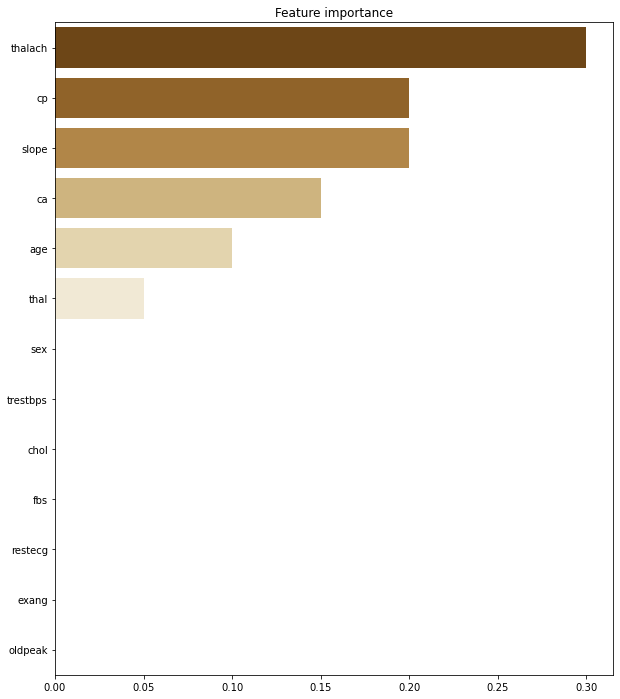

In [101]:
# Plot features importances
imp = pd.Series(data=Model.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(10,12))
plt.title("Feature importance")
ax = sns.barplot(y=imp.index, x=imp.values, palette="BrBG", orient='h')


# Random Forest Visualization

In [102]:
# Import tools needed for visualization
from sklearn.tree import export_graphviz
import pydot

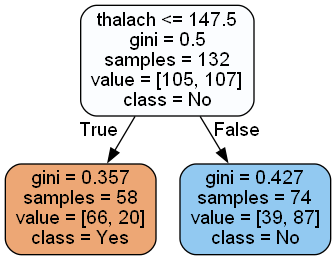

In [103]:
tree = Model.estimators_[1]  # specify the tree number   
target=['Yes','No'] 
# Export the image to a dot file
feature_list = list(X.columns)  # all variable name
export_graphviz(tree, out_file = 'abc.dot', 
                feature_names = feature_list, 
                leaves_parallel=True,
                class_names=target,
                rounded = True, 
                filled=True)
# Use dot file to create a graph
(graph,)= pydot.graph_from_dot_file('abc.dot')
# Write graph to a png file
graph.write_png('tree.png')
from IPython.display import Image
Image(filename = 'tree.png')

# Step 6 : Predictions on Train Dataset

In [104]:
train=pd.concat([X_train,y_train],axis=1)
train.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
111,57,1,2,150.0,126.0,0.0,1,173.0,0,0.2,2,1.0,3.0,Yes
156,47,1,2,130.0,253.0,0.0,1,179.0,0,0.0,2,0.0,2.0,Yes
209,59,1,0,140.0,177.0,0.0,1,162.0,1,0.0,2,1.0,3.0,No
58,34,1,3,118.0,182.0,0.0,0,174.0,0,0.0,2,0.0,2.0,Yes
48,53,0,2,128.0,216.0,0.0,0,115.0,0,0.0,2,0.0,0.5,Yes


In [105]:
train['Predicted']=Model.predict(X_train)
train.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,Predicted
111,57,1,2,150.0,126.0,0.0,1,173.0,0,0.2,2,1.0,3.0,Yes,Yes
156,47,1,2,130.0,253.0,0.0,1,179.0,0,0.0,2,0.0,2.0,Yes,Yes
209,59,1,0,140.0,177.0,0.0,1,162.0,1,0.0,2,1.0,3.0,No,Yes
58,34,1,3,118.0,182.0,0.0,0,174.0,0,0.0,2,0.0,2.0,Yes,Yes
48,53,0,2,128.0,216.0,0.0,0,115.0,0,0.0,2,0.0,0.5,Yes,Yes


# Step 7 : Model Performance Metrics

In [106]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(train['target'], train['Predicted'])
print(confusion_matrix)

[[68 30]
 [17 97]]


In [107]:
Accuracy_Train=((68+97)/(212)*100)
print(Accuracy_Train)

77.83018867924528


In [108]:
from sklearn.metrics import classification_report
print(classification_report(train['target'], train['Predicted']))

              precision    recall  f1-score   support

          No       0.80      0.69      0.74        98
         Yes       0.76      0.85      0.80       114

    accuracy                           0.78       212
   macro avg       0.78      0.77      0.77       212
weighted avg       0.78      0.78      0.78       212



# Step 8 : Predictions on Test Dataset

In [109]:
test=pd.concat([X_test,y_test],axis=1)
test.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
263,63,0,0,108.0,269.0,0.0,1,169.0,1,1.8,1,2.0,2.0,No
77,59,1,1,140.0,221.0,0.0,1,164.0,1,0.0,2,0.0,2.0,Yes
163,38,1,2,138.0,175.0,0.0,1,173.0,0,0.0,2,2.5,2.0,Yes
206,59,1,0,110.0,239.0,0.0,0,142.0,1,1.2,1,1.0,3.0,No
167,62,0,0,140.0,268.0,0.0,0,160.0,0,3.6,0,2.0,2.0,No


In [110]:
test['Predicted']=Model.predict(X_test)
test.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,Predicted
263,63,0,0,108.0,269.0,0.0,1,169.0,1,1.8,1,2.0,2.0,No,No
77,59,1,1,140.0,221.0,0.0,1,164.0,1,0.0,2,0.0,2.0,Yes,Yes
163,38,1,2,138.0,175.0,0.0,1,173.0,0,0.0,2,2.5,2.0,Yes,Yes
206,59,1,0,110.0,239.0,0.0,0,142.0,1,1.2,1,1.0,3.0,No,No
167,62,0,0,140.0,268.0,0.0,0,160.0,0,3.6,0,2.0,2.0,No,No


# Step 9 : Model Performance Metrics on Test data 

In [111]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(test['Predicted'],test['target'])
print(confusion_matrix)

[[25  9]
 [15 42]]


In [112]:
Accuracy_Test=((25+42)/(91)*100)
print(Accuracy_Test)

73.62637362637363


In [113]:
from sklearn.metrics import classification_report
print(classification_report(test['target'], test['Predicted']))

              precision    recall  f1-score   support

          No       0.74      0.62      0.68        40
         Yes       0.74      0.82      0.78        51

    accuracy                           0.74        91
   macro avg       0.74      0.72      0.73        91
weighted avg       0.74      0.74      0.73        91

